In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="ticks", font='Times New Roman', font_scale=1.4)

import tensorflow as tf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
data_path = 'Data/'
save_path = 'Output_figs/'
model_path = 'Model_Saved/'

## 第一章

### 不同氢气生产方式份额

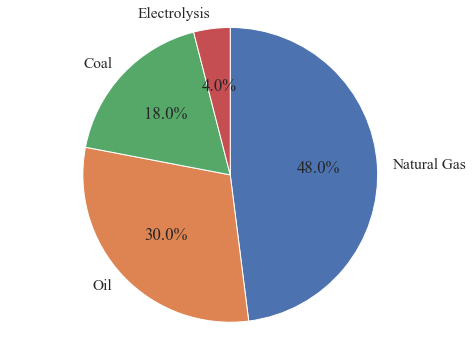

In [5]:
labels = ['Natural Gas','Oil','Coal','Electrolysis']
data = [48,30,18,4]

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(8,6))
ax = plt.gca()
plt.pie(data, labels=labels, autopct='%1.1f%%',
        startangle=90,counterclock=False)
plt.axis('equal')
plt.savefig(save_path+'Hydrogen_production_way.png',dpi=300,bbox_inches='tight' )

## 第二章

无

## 第三章

### 等温线

In [6]:
CO2 = pd.read_excel(data_path + 'isotherms.xlsx',sheet_name='CO2')
H2 = pd.read_excel(data_path + 'isotherms.xlsx',sheet_name='H2')

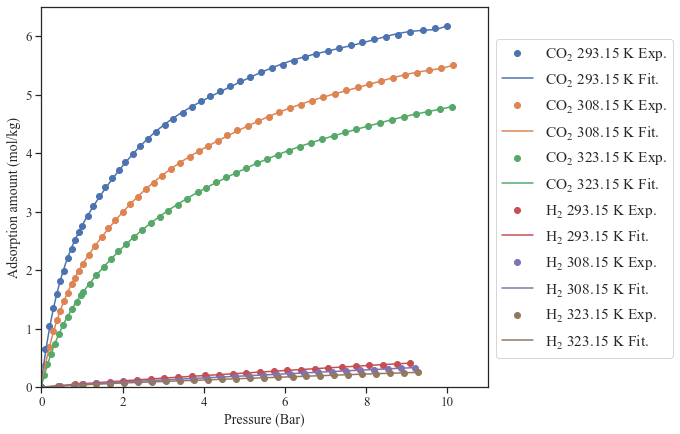

In [7]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
ax = plt.figure(figsize=(8,7))
T = [293.15,308.15,323.15]
for t in T:
        plt.scatter(CO2[CO2['T']==t]['P'], CO2[CO2['T']==t]['q'],label='$\mathregular{CO_2}$ ' + str(t) + ' K Exp.')
        plt.plot(CO2[CO2['Tfit']==t]['Pfit'], CO2[CO2['Tfit']==t]['qfit'],label='$\mathregular{CO_2}$ ' + str(t) + ' K Fit.')
for t in T:
        plt.scatter(H2[H2['T']==t]['P'], H2[H2['T']==t]['q'],label='$\mathregular{H_2}$ ' + str(t) + ' K Exp.')
        plt.plot(H2[H2['Tfit']==t]['Pfit'], H2[H2['Tfit']==t]['qfit'],label='$\mathregular{H_2}$ ' + str(t) + ' K Fit.')

ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Pressure (Bar)",fontsize=14)
plt.ylabel("Adsorption amount (mol/kg)",fontsize=14)
plt.xlim(0,11)
plt.ylim(0,6.5)
plt.savefig(save_path + 'isotherms.png',dpi=300,bbox_inches='tight' )

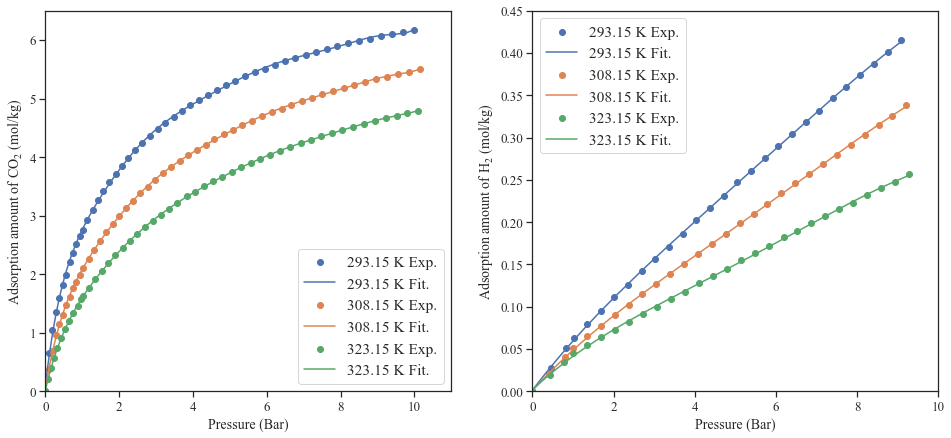

In [8]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(16,7))
T = [293.15,308.15,323.15]
for t in T:
        axs[0].scatter(CO2[CO2['T']==t]['P'], CO2[CO2['T']==t]['q'],label=str(t) + ' K Exp.')
        axs[0].plot(CO2[CO2['Tfit']==t]['Pfit'], CO2[CO2['Tfit']==t]['qfit'],label=str(t) + ' K Fit.')
axs[0].set_xlabel("Pressure (Bar)",fontsize=14)
axs[0].set_ylabel('Adsorption amount of $\mathregular{CO_2}$ (mol/kg)',fontsize=14)
axs[0].tick_params(labelsize='13')
axs[0].legend()
axs[0].set_xlim(0,11)
axs[0].set_ylim(0,6.5)

for t in T:
        axs[1].scatter(H2[H2['T']==t]['P'], H2[H2['T']==t]['q'],label=str(t) + ' K Exp.')
        axs[1].plot(H2[H2['Tfit']==t]['Pfit'], H2[H2['Tfit']==t]['qfit'],label=str(t) + ' K Fit.')
axs[1].set_xlabel("Pressure (Bar)",fontsize=14)
axs[1].set_ylabel('Adsorption amount of $\mathregular{H_2}$ (mol/kg)',fontsize=14)
axs[1].tick_params(labelsize='13')
axs[1].legend()
axs[1].set_xlim(0,10)
axs[1].set_ylim(0,0.45)

plt.savefig(save_path + 'isotherms_split.png',dpi=300,bbox_inches='tight' )

### 吸附热

In [9]:
H_CO2 = pd.read_excel(data_path + 'adsorption_heat.xlsx',sheet_name='CO2')
H_H2 = pd.read_excel(data_path + 'adsorption_heat.xlsx',sheet_name='H2')

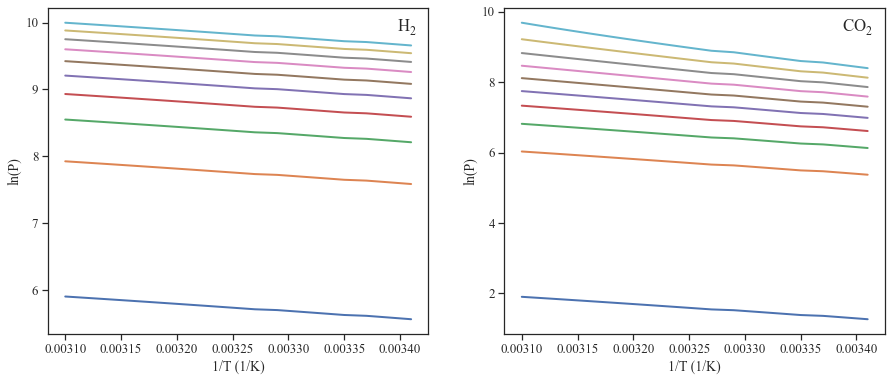

In [10]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(15,6))

axs[0].plot(H_H2['1/T'],H_H2.drop(['1/T'],axis=1),lw=2)
axs[0].set_xlabel("1/T (1/K)",fontsize=14)
axs[0].set_ylabel('ln(P)',fontsize=14)
axs[0].tick_params(labelsize='13')
axs[0].text(0.97,0.97,'$\mathregular{H_2}$',ha="right",va="top",transform=axs[0].transAxes,)

axs[1].plot(H_CO2['1/T'],H_CO2.drop(['1/T'],axis=1),lw=2)
axs[1].set_xlabel("1/T (1/K)",fontsize=14)
axs[1].set_ylabel('ln(P)',fontsize=14)
axs[1].tick_params(labelsize='13')
axs[1].text(0.97,0.97,'$\mathregular{CO_2}$',ha="right",va="top",transform=axs[1].transAxes,)

plt.savefig(save_path + 'Adsorption_Heat.png',dpi=300,bbox_inches='tight' )

### 穿透曲线

In [11]:
P10F10 = pd.read_excel(data_path + 'breakthrough.xlsx',sheet_name='10bar10SLPM')
P10F20 = pd.read_excel(data_path + 'breakthrough.xlsx',sheet_name='10bar20SLPM')
P20F10 = pd.read_excel(data_path + 'breakthrough.xlsx',sheet_name='20bar10SLPM')
P20F20 = pd.read_excel(data_path + 'breakthrough.xlsx',sheet_name='20bar20SLPM')

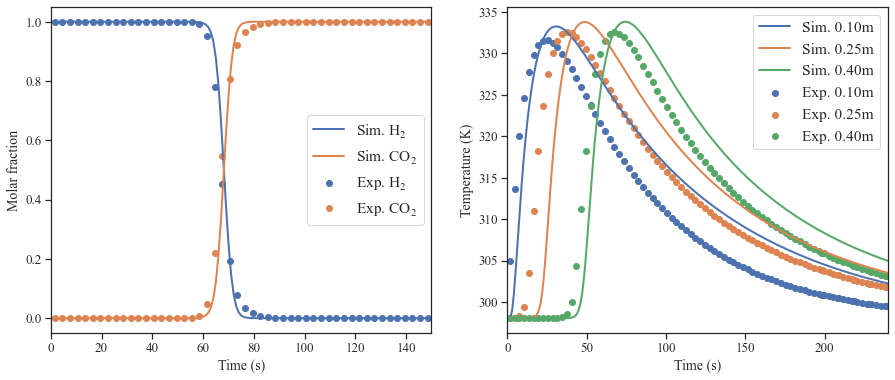

In [12]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(15,6))

axs[0].plot(P10F10['t'],P10F10[['yH2','yCO2']],lw=2,label=['Sim. $\mathregular{H_2}$','Sim. $\mathregular{CO_2}$'])
axs[0].scatter(P10F10['texp1'],P10F10['yH2exp'],label='Exp. $\mathregular{H_2}$')
axs[0].scatter(P10F10['texp1'],P10F10['yCO2exp'],label='Exp. $\mathregular{CO_2}$')
axs[0].set_xlabel("Time (s)",fontsize=14)
axs[0].set_ylabel('Molar fraction',fontsize=14)
axs[0].set_xlim(0,150)
axs[0].tick_params(labelsize='13')
axs[0].legend()

axs[1].plot(P10F10['t'],P10F10[['T0.1','T0.25','T0.4']],lw=2,label=['Sim. 0.10m','Sim. 0.25m','Sim. 0.40m'])
axs[1].scatter(P10F10['texp2'],P10F10['T0.1exp'],label='Exp. 0.10m')
axs[1].scatter(P10F10['texp2'],P10F10['T0.25exp'],label='Exp. 0.25m')
axs[1].scatter(P10F10['texp2'],P10F10['T0.4exp'],label='Exp. 0.40m')
axs[1].set_xlabel("Time (s)",fontsize=14)
axs[1].set_ylabel('Temperature (K)',fontsize=14)
axs[1].set_xlim(0,240)
axs[1].tick_params(labelsize='13')
axs[1].legend()

plt.savefig(save_path + 'break_P10F10.png',dpi=300,bbox_inches='tight' )

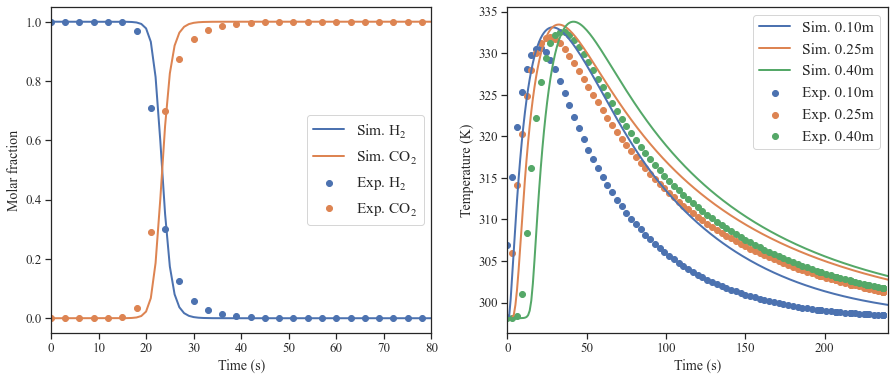

In [13]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(15,6))

axs[0].plot(P10F20['t'],P10F20[['yH2','yCO2']],lw=2,label=['Sim. $\mathregular{H_2}$','Sim. $\mathregular{CO_2}$'])
axs[0].scatter(P10F20['texp1'],P10F20['yH2exp'],label='Exp. $\mathregular{H_2}$')
axs[0].scatter(P10F20['texp1'],P10F20['yCO2exp'],label='Exp. $\mathregular{CO_2}$')
axs[0].set_xlabel("Time (s)",fontsize=14)
axs[0].set_ylabel('Molar fraction',fontsize=14)
axs[0].set_xlim(0,80)
axs[0].tick_params(labelsize='13')
axs[0].legend()

axs[1].plot(P10F20['t'],P10F20[['T0.1','T0.25','T0.4']],lw=2,label=['Sim. 0.10m','Sim. 0.25m','Sim. 0.40m'])
axs[1].scatter(P10F20['texp2'],P10F20['T0.1exp'],label='Exp. 0.10m')
axs[1].scatter(P10F20['texp2'],P10F20['T0.25exp'],label='Exp. 0.25m')
axs[1].scatter(P10F20['texp2'],P10F20['T0.4exp'],label='Exp. 0.40m')
axs[1].set_xlabel("Time (s)",fontsize=14)
axs[1].set_ylabel('Temperature (K)',fontsize=14)
axs[1].set_xlim(0,240)
axs[1].tick_params(labelsize='13')
axs[1].legend()

plt.savefig(save_path + 'break_P10F20.png',dpi=300,bbox_inches='tight' )

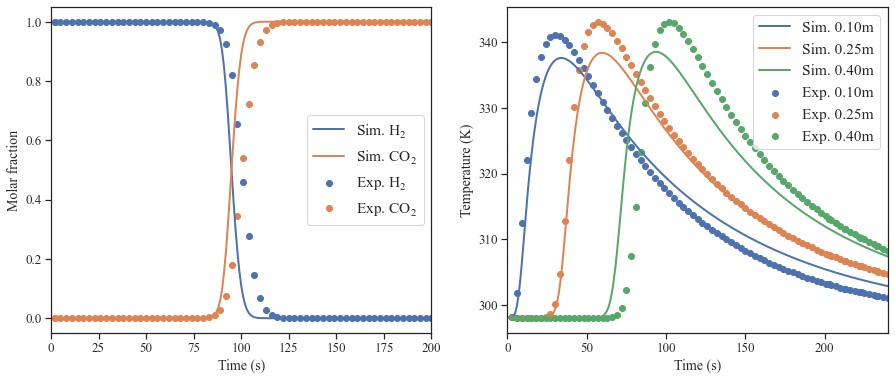

In [14]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(15,6))

axs[0].plot(P20F10['t'],P20F10[['yH2','yCO2']],lw=2,label=['Sim. $\mathregular{H_2}$','Sim. $\mathregular{CO_2}$'])
axs[0].scatter(P20F10['texp1'],P20F10['yH2exp'],label='Exp. $\mathregular{H_2}$')
axs[0].scatter(P20F10['texp1'],P20F10['yCO2exp'],label='Exp. $\mathregular{CO_2}$')
axs[0].set_xlabel("Time (s)",fontsize=14)
axs[0].set_ylabel('Molar fraction',fontsize=14)
axs[0].set_xlim(0,200)
axs[0].tick_params(labelsize='13')
axs[0].legend()

axs[1].plot(P20F10['t'],P20F10[['T0.1','T0.25','T0.4']],lw=2,label=['Sim. 0.10m','Sim. 0.25m','Sim. 0.40m'])
axs[1].scatter(P20F10['texp2'],P20F10['T0.1exp'],label='Exp. 0.10m')
axs[1].scatter(P20F10['texp2'],P20F10['T0.25exp'],label='Exp. 0.25m')
axs[1].scatter(P20F10['texp2'],P20F10['T0.4exp'],label='Exp. 0.40m')
axs[1].set_xlabel("Time (s)",fontsize=14)
axs[1].set_ylabel('Temperature (K)',fontsize=14)
axs[1].set_xlim(0,240)
axs[1].tick_params(labelsize='13')
axs[1].legend()

plt.savefig(save_path + 'break_P20F10.png',dpi=300,bbox_inches='tight' )

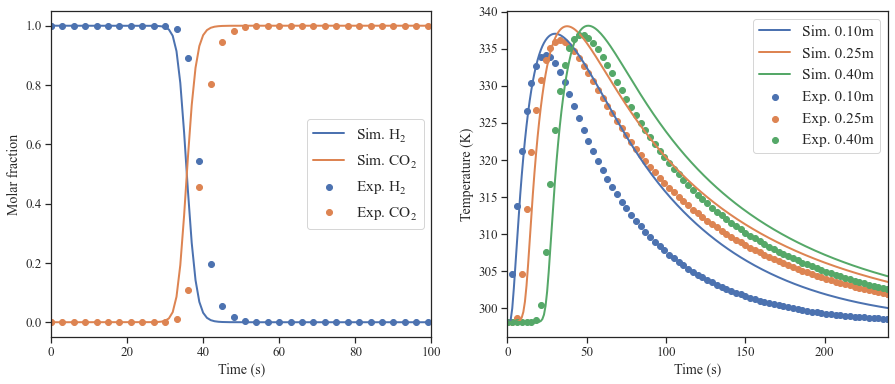

In [15]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
fig, axs = plt.subplots(1, 2,figsize=(15,6))

axs[0].plot(P20F20['t'],P20F20[['yH2','yCO2']],lw=2,label=['Sim. $\mathregular{H_2}$','Sim. $\mathregular{CO_2}$'])
axs[0].scatter(P20F20['texp1'],P20F20['yH2exp'],label='Exp. $\mathregular{H_2}$')
axs[0].scatter(P20F20['texp1'],P20F20['yCO2exp'],label='Exp. $\mathregular{CO_2}$')
axs[0].set_xlabel("Time (s)",fontsize=14)
axs[0].set_ylabel('Molar fraction',fontsize=14)
axs[0].set_xlim(0,100)
axs[0].tick_params(labelsize='13')
axs[0].legend()

axs[1].plot(P20F20['t'],P20F20[['T0.1','T0.25','T0.4']],lw=2,label=['Sim. 0.10m','Sim. 0.25m','Sim. 0.40m'])
axs[1].scatter(P20F20['texp2'],P20F20['T0.1exp'],label='Exp. 0.10m')
axs[1].scatter(P20F20['texp2'],P20F20['T0.25exp'],label='Exp. 0.25m')
axs[1].scatter(P20F20['texp2'],P20F20['T0.4exp'],label='Exp. 0.40m')
axs[1].set_xlabel("Time (s)",fontsize=14)
axs[1].set_ylabel('Temperature (K)',fontsize=14)
axs[1].set_xlim(0,240)
axs[1].tick_params(labelsize='13')
axs[1].legend()

plt.savefig(save_path + 'break_P20F20.png',dpi=300,bbox_inches='tight' )

## 第四章

### LHS取样结果
```
file = "LHC300_1.mat"
from scipy import io

mat = io.loadmat(file)

np.save('Input_of_LHC300_1', np.mat(mat["Input"]))
```

In [16]:
LHS_input = pd.DataFrame(np.load(data_path + 'Input_of_LHC300_1.npy'),
                         columns=[
                                 't_AD (s)', 't_CD (s)', 't_BD (s)', 't_VU (s)',
                                 't_FP (s)', 'P_CD (Pa)', 'F_feed (SLPM)'
                         ])

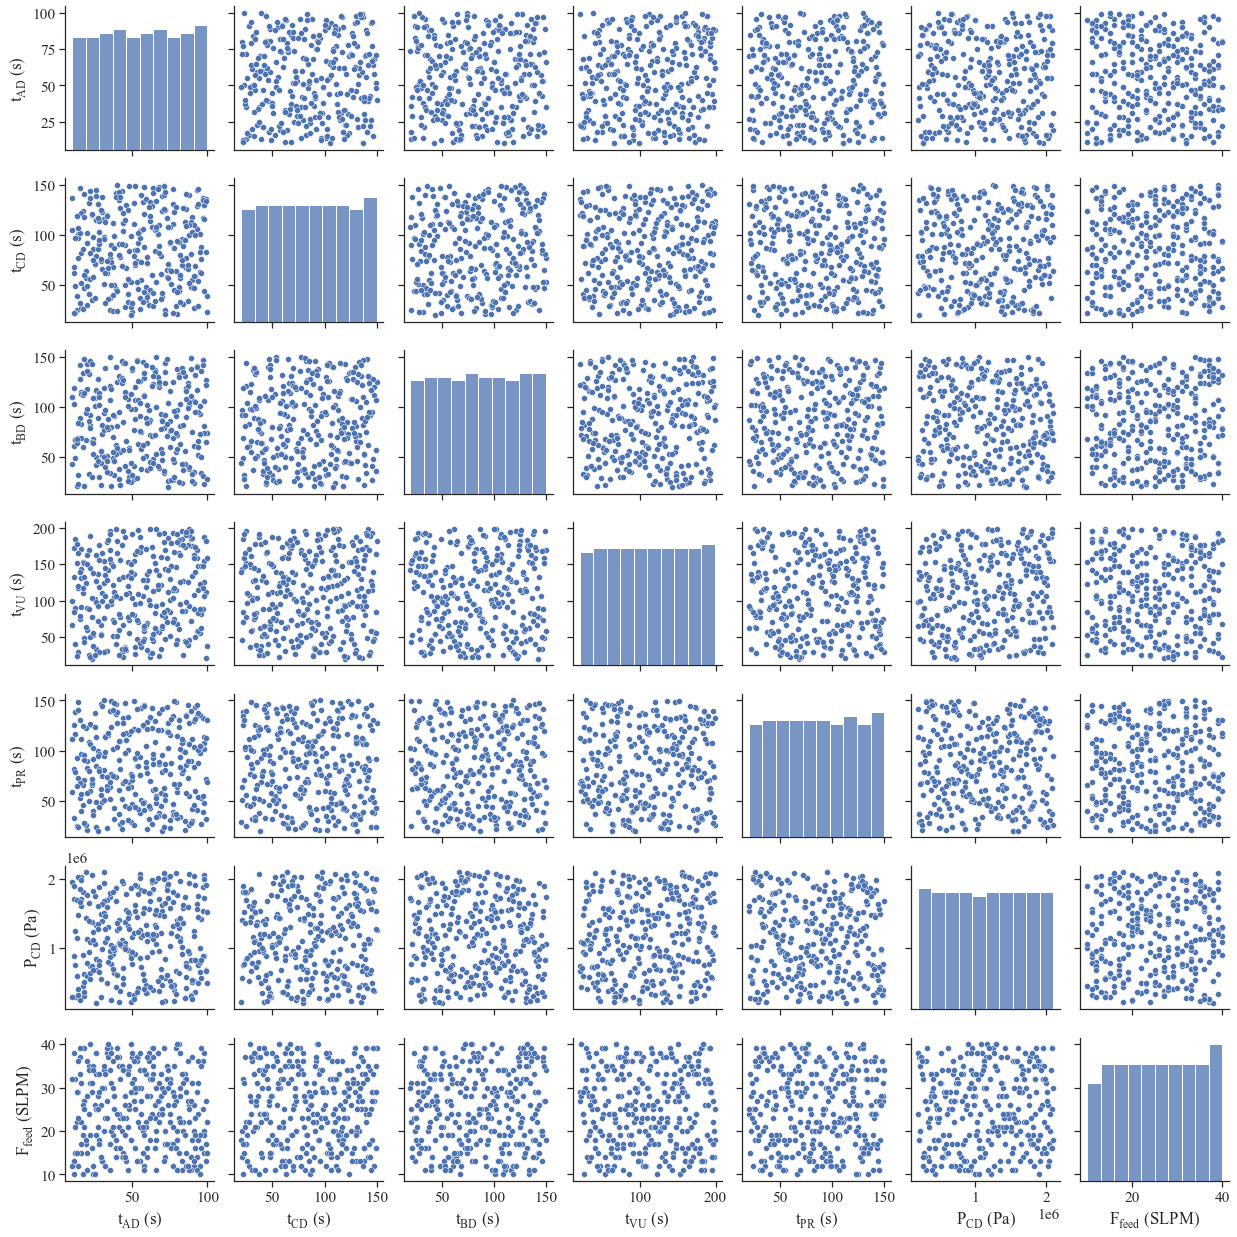

In [17]:
sns.set_theme(style="ticks",font='Times New Roman',font_scale=1.4)
x_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)'
]
y_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)'
]
g = sns.pairplot(LHS_input,plot_kws={'alpha':1})
for i in range(7):
        for j in range(7):
                g.axes[i, 0].yaxis.set_label_text(y_axis_labels[i])
                g.axes[6, j].xaxis.set_label_text(x_axis_labels[j])

plt.savefig(save_path + 'LHS300.png',dpi=300,bbox_inches='tight' )

### 300个样本计算结果
```
file = "OneBed_5Steps_PR_22bar_noTMB_LHC300.mat"
path = 'OneBed_5Steps_PR_22bar_noTMB_LHC300/'
from scipy import io
mat = io.loadmat(file)

keys = [
    "Input", "result_matrix", "Work", "Energy", "CO2_Purity", "CO2_Recovery",
    "CO2_Productivity", "H2_Purity", "H2_Recovery", "H2_Productivity",
    "H2_Error", "CO2_Error", "Tem_AD", "Tem_BD", "Tem_CD", "Tem_FP", "Tem_VU",
    "q_CO2_AD", "q_CO2_BD", "q_CO2_CD", "q_CO2_FP", "q_CO2_VU", "q_H2_AD",
    "q_H2_BD", "q_H2_CD", "q_H2_FP", "q_H2_VU", "y_CO2_AD", "y_CO2_BD",
    "y_CO2_CD", "y_CO2_FP", "y_CO2_VU", "y_H2_AD", "y_H2_BD", "y_H2_CD",
    "y_H2_FP", "y_H2_VU"
]

for dataframe in keys:
    np.save(path + dataframe, np.mat(mat[dataframe]))
```

In [18]:
Inputs = pd.DataFrame(np.load(data_path + 'OneBed_5Steps_PR_22bar_noTMB_LHC300/Input.npy'), columns = ['t_AD (s)', 't_CD (s)', 't_BD (s)', 't_VU (s)', 't_FP (s)', 'P_CD (Pa)', 'Ffeed (SLPM)'])
result_matrix = pd.DataFrame(np.load(data_path + 'OneBed_5Steps_PR_22bar_noTMB_LHC300/result_matrix.npy'))
scalar = result_matrix.iloc[:, 0:11]
scalar.columns = [
        "Run", "Work [J]", "Energy (J/(kgCO2))", "H2_Purity (%)",
        "H2_Recovery (%)", "H2_Productivity (mol/kgAds/h)", "CO2_Purity (%)",
        "CO2_Recovery (%)", "CO2_Productivity (mol/kgAds/h)", "H2_Error (%)",
        "CO2_Error (%)"
]
Inputs_scalar = pd.concat([Inputs,scalar],axis=1)

#### 误差

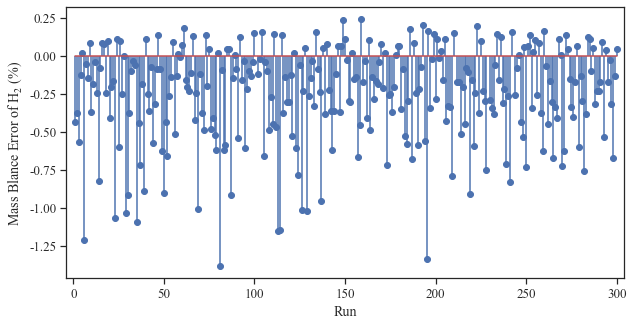

In [19]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.stem(Inputs_scalar['Run'], Inputs_scalar['H2_Error (%)'])

plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Run",fontsize=14)
plt.ylabel("Mass Blance Error of $\mathregular{H_2}$ (%)",fontsize=14)
plt.xlim(-4,304)         #设置x轴的范围
plt.savefig(save_path + 'H2_Error.png',dpi=300,bbox_inches='tight' )

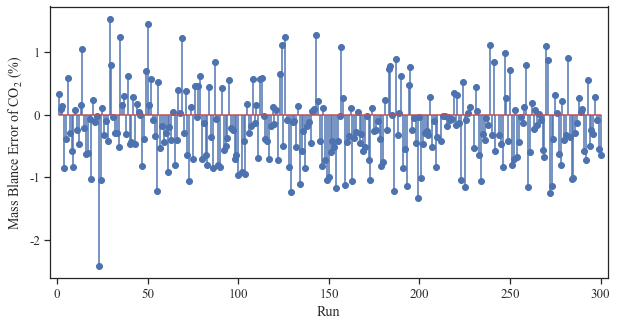

In [20]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.stem(Inputs_scalar['Run'], Inputs_scalar['CO2_Error (%)'])

plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Run",fontsize=14)
plt.ylabel("Mass Blance Error of $\mathregular{CO_2}$ (%)",fontsize=14)
plt.xlim(-4,304)         #设置x轴的范围
plt.savefig(save_path + 'CO2_Error.png',dpi=300,bbox_inches='tight' )

#### 纯度-回收率

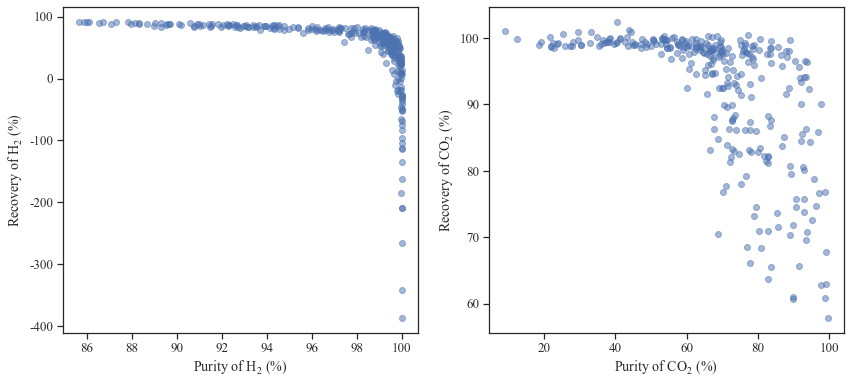

In [21]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
ax1.scatter(Inputs_scalar['H2_Purity (%)'], Inputs_scalar['H2_Recovery (%)'],alpha=0.5)
ax1.set_xlabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.tick_params(labelsize='13')

ax2.scatter(Inputs_scalar['CO2_Purity (%)'], Inputs_scalar['CO2_Recovery (%)'],alpha=0.5)
ax2.set_xlabel('Purity of $\mathregular{CO_2}$ (%)',fontsize=14)
ax2.set_ylabel('Recovery of $\mathregular{CO_2}$ (%)',fontsize=14)
ax2.tick_params(labelsize='13')

plt.savefig(save_path + 'H2_CO2_ALL_Scatter.png',dpi=300,bbox_inches='tight' )

#### 散点矩阵图

In [22]:
#分析回收率小于0的原因
H2_recovery_analysis = Inputs_scalar[[
        't_AD (s)', 't_CD (s)', 't_BD (s)', 't_VU (s)', 't_FP (s)', 'P_CD (Pa)',
        'Ffeed (SLPM)', 'H2_Recovery_Category'
]]

x_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)'
]
y_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)'
]

sns.set_theme(style="ticks", font='Times New Roman', font_scale=1.4)
g = sns.pairplot(H2_recovery_analysis, hue='H2_Recovery_Category')

for i in range(7):
        for j in range(7):
                g.axes[i, 0].yaxis.set_label_text(y_axis_labels[i])
                g.axes[6, j].xaxis.set_label_text(x_axis_labels[j])

plt.savefig(save_path + 'H2_recovery_analysis.png',dpi=300,bbox_inches='tight' )

KeyError: "['H2_Recovery_Category'] not in index"

#### 进料-氢气回收率

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
sns.set_theme(style="ticks",font='Times New Roman',font_scale=1.2)
sns.boxplot(x='H2_Recovery_Category', y="t_AD (s)", data=Inputs_scalar,ax=ax1)
sns.boxplot(x='H2_Recovery_Category', y="Ffeed (SLPM)", data=Inputs_scalar,ax=ax2)

ax1.set(xlabel='$\mathregular{H_2}$ Recovery Category', ylabel='$\mathregular{t_{AD}}$ (s)')
ax2.set(xlabel='$\mathregular{H_2}$ Recovery Category', ylabel='$\mathregular{F_{feed}}$ (s)')

plt.savefig(save_path + 'H2_recovery_analysis2.png',dpi=300,bbox_inches='tight' )

#### 去掉氢气回收率大于0的样本

In [ ]:
#Data_RH2_class
RH2_index = Inputs_scalar[Inputs_scalar['H2_Recovery (%)'] < 0].index
Inputs_scalar['H2_Recovery_Category'] = 'Positive'
Inputs_scalar.H2_Recovery_Category[RH2_index] = 'Negative'
Final_Data = Inputs_scalar[Inputs_scalar['H2_Recovery_Category'] == 'Positive']

#### 纯度-回收率

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,6))
ax1.scatter(Final_Data['H2_Purity (%)'], Final_Data['H2_Recovery (%)'],alpha=0.5)
ax1.set_xlabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.tick_params(labelsize='13')

ax2.scatter(Final_Data['CO2_Purity (%)'], Final_Data['CO2_Recovery (%)'],alpha=0.5)
ax2.set_xlabel('Purity of $\mathregular{CO_2}$ (%)',fontsize=14)
ax2.set_ylabel('Recovery of $\mathregular{CO_2}$ (%)',fontsize=14)
ax2.tick_params(labelsize='13')

plt.savefig(save_path + 'H2_CO2_Final_Scatter.png',dpi=300,bbox_inches='tight' )

#### 相关性热力图

In [ ]:
H2_data = Inputs_scalar[[
        't_AD (s)', 't_CD (s)', 't_BD (s)', 't_VU (s)', 't_FP (s)', 'P_CD (Pa)',
        'Ffeed (SLPM)', "H2_Purity (%)", "H2_Recovery (%)",
        "H2_Productivity (mol/kgAds/h)", 'H2_Recovery_Category'
]]
H2_corr_Final = H2_data.corr()[7:10]

CO2_data = Inputs_scalar[[
        't_AD (s)', 't_CD (s)', 't_BD (s)', 't_VU (s)', 't_FP (s)', 'P_CD (Pa)',
        'Ffeed (SLPM)', "Energy (J/(kgCO2))", "CO2_Purity (%)", "CO2_Recovery (%)",
        "CO2_Productivity (mol/kgAds/h)"
]]
CO2_corr_Final = CO2_data.corr()[7:11]

In [ ]:
plt.figure(figsize=(10, 2.4))
x_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)', "$\mathregular{H_2}$ Purity (%)",
        "$\mathregular{H_2}$ Recovery (%)",
        "$\mathregular{H_2}$ Productivity (mol/kgAds/h)"
]
y_axis_labels = [
        "$\mathregular{H_2}$ Purity (%)", "$\mathregular{H_2}$ Recovery (%)",
        "$\mathregular{H_2}$ Productivity (mol/kgAds/h)"
]

g = sns.heatmap(H2_corr_Final,
                annot=True,
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)

g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

plt.savefig(save_path + 'Heatmap_H2.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.figure(figsize=(10, 3.2))
x_axis_labels = [
        '$\mathregular{t_{AD}}$ (s)', '$\mathregular{t_{CD}}$ (s)',
        '$\mathregular{t_{BD}}$ (s)', '$\mathregular{t_{VU}}$ (s)',
        '$\mathregular{t_{PR}}$ (s)', '$\mathregular{P_{CD}}$ (Pa)',
        '$\mathregular{F_{feed}}$ (SLPM)', "Energy (J/(kg$\mathregular{CO_2}$))",
        "$\mathregular{CO_2}$ Purity (%)", "$\mathregular{CO_2}$ Recovery (%)",
        "$\mathregular{CO_2}$ Productivity (mol/kgAds/h)"
]
y_axis_labels = [
        "Energy (J/(kg$\mathregular{CO_2}$))", "$\mathregular{CO_2}$ Purity (%)",
        "$\mathregular{CO_2}$ Recovery (%)",
        "$\mathregular{CO_2}$ Productivity (mol/kgAds/h)"
]

g = sns.heatmap(CO2_corr_Final,
                annot=True,
                xticklabels=x_axis_labels,
                yticklabels=y_axis_labels)

g.set_xticklabels(g.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

plt.savefig(save_path + 'Heatmap_CO2.png',dpi=300,bbox_inches='tight' )

### 神经网络训练结果

#### 节点数测试结果

In [ ]:
scalar_result_nodes_1 = pd.read_excel(data_path + 'scalar_result_nodes_1.xlsx',index_col=0)
scalar_result_nodes_2 = pd.read_excel(data_path + 'scalar_result_nodes_2.xlsx',index_col=0)
scalar_result_nodes_3 = pd.read_excel(data_path + 'scalar_result_nodes_3.xlsx',index_col=0)
scalar_result_nodes = (scalar_result_nodes_1 + scalar_result_nodes_2 + scalar_result_nodes_3) / 3

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(10,5))
ax = plt.gca()

keys = [
        "CO2_Purity",
        "CO2_Recovery",
        "CO2_Productivity",
        "H2_Purity",
        "H2_Recovery",
        "H2_Productivity",
]
labels = [
        'Purity of $\mathregular{CO_2}$',
        'Recovery of $\mathregular{CO_2}$',
        'Productivity of $\mathregular{CO_2}$',
        'Purity of $\mathregular{H_2}$',
        'Recovery of $\mathregular{H_2}$',
        'Productivity of $\mathregular{H_2}$',
]

for key,label in zip(keys,labels):
        plt.plot(scalar_result_nodes['Nodes'], scalar_result_nodes[key],'o-',label=label)

plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Number of hidden layer neurons",fontsize=14)
plt.ylabel("$\mathregular{R^2_Adj}$",fontsize=14)
plt.xlim(4,41)         #设置x轴的范围
plt.savefig(save_path + 'scalar_result_nodes.png',dpi=300,bbox_inches='tight' )

#### 网络性能测试

In [ ]:
def R2_Adj(y_true, y_pred):
        n, k = 863, 7
        R2 = r2_score(y_true, y_pred)
        R2_Adj = 1 - (1 - R2) * (n - 1) / (n - k - 1)
        return R2_Adj

In [ ]:
keys = [
        "CO2_Purity",
        "CO2_Recovery",
        "CO2_Productivity",
        "H2_Purity",
        "H2_Recovery",
        "H2_Productivity",
]

In [ ]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

labels = [
        'Purity of $\mathregular{CO_2}$',
        'Recovery of $\mathregular{CO_2}$',
        'Productivity of $\mathregular{CO_2}$',
        'Purity of $\mathregular{H_2}$',
        'Recovery of $\mathregular{H_2}$',
        'Productivity of $\mathregular{H_2}$',
]

for key, ax, name in zip(keys, axs.ravel(), labels):
        x_train = np.load(data_path + 'DL_1000/' + 'Input.npy')
        y_train = np.load(data_path + 'DL_1000/' + key + ".npy")
        scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
        scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

        x_test = np.load(data_path + 'DL_300/' + 'Input.npy')
        y_test = np.load(data_path + 'DL_300/' + key + ".npy")
        x_test_std = scaler_x.transform(x_test)

        model = tf.keras.models.load_model(model_path + key)

        y_pred_std = model.predict(x_test_std)
        y_pred = scaler_y.inverse_transform(y_pred_std)

        score = R2_Adj(y_test, y_pred)

        ax.scatter(y_pred, y_test, alpha=0.5)
        ax.text(0.05,
                0.95,
                name + '\n$\mathregular{R_{Adj}^2}$' + ' = {:.4f}'.format(score),
                ha="left",
                va="top",
                transform=ax.transAxes,
                )

        ax.set_xlabel("Prediction of MLP-based Surrogate Model", fontsize=14)
        ax.set_ylabel("Result of Detailed Model", fontsize=14)
        ax.tick_params(labelsize='13')

plt.savefig(save_path + 'scalar_ANNs_test.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(3, 2, figsize=(14, 18))

labels = [
        'Purity of $\mathregular{CO_2}$',
        'Recovery of $\mathregular{CO_2}$',
        'Productivity of $\mathregular{CO_2}$',
        'Purity of $\mathregular{H_2}$',
        'Recovery of $\mathregular{H_2}$',
        'Productivity of $\mathregular{H_2}$',
]

for key, ax, name in zip(keys, axs.ravel(), labels):
        x_train = np.load(data_path + 'DL_1000/' + 'Input.npy')
        y_train = np.load(data_path + 'DL_1000/' + key + ".npy")
        scaler_x = MinMaxScaler(feature_range=(0, 1)).fit(x_train)
        scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y_train)

        x_test = np.load(data_path + 'DL_300/' + 'Input.npy')
        y_test = np.load(data_path + 'DL_300/' + key + ".npy")
        x_test_std = scaler_x.transform(x_test)

        model = tf.keras.models.load_model(model_path + key)

        y_pred_std = model.predict(x_test_std)
        y_pred = scaler_y.inverse_transform(y_pred_std)

        score = R2_Adj(y_test, y_pred)

        ax.scatter(y_pred, y_test, alpha=0.5)
        ax.text(0.05,
                0.95,
                name + '\n$\mathregular{R_{Adj}^2}$' + ' = {:.4f}'.format(score),
                ha="left",
                va="top",
                transform=ax.transAxes,
                )

        ax.set_xlabel("Prediction of MLP-based Surrogate Model", fontsize=14)
        ax.set_ylabel("Result of Detailed Model", fontsize=14)
        ax.tick_params(labelsize='13')

plt.savefig(save_path + 'scalar_ANNs_test2.png',dpi=300,bbox_inches='tight' )

#### 节点数测试结果2

In [ ]:
vector_result_nodes = pd.read_excel(data_path + 'vector_result_nodes.xlsx',index_col=0)[0:46]

In [ ]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

fig, axs = plt.subplots(3, 2, figsize=(14, 18))

labels = [
        'AD',
        'CD',
        'BD',
        'VU',
        'PR',
]

keys1 = ["Tem_AD", "Tem_CD", "Tem_BD", "Tem_VU", "Tem_FP"]
keys2 = ["q_H2_AD", "q_H2_CD", "q_H2_BD", "q_H2_VU", "q_H2_FP"]
keys3 = ["q_CO2_AD", "q_CO2_CD", "q_CO2_BD", "q_CO2_VU", "q_CO2_FP"]
keys4 = ["y_H2_AD", "y_H2_CD", "y_H2_BD", "y_H2_VU", "y_H2_FP"]
keys5 = ["y_CO2_AD", "y_CO2_CD", "y_CO2_BD", "y_CO2_VU", "y_CO2_FP"]
keys = [keys1,keys2,keys3,keys4,keys5]

names = ['Temperature','$\mathregular{q_{H_2}}$','$\mathregular{q_{CO_2}}$','$\mathregular{y_{H_2}}$', '$\mathregular{y_{CO_2}}$']

for key, ax, name in zip(keys, axs.ravel(), names):
        ax.plot(vector_result_nodes['Nodes'], vector_result_nodes[key],'o-',label=labels)
        ax.legend()
        ax.set_xlabel("Number of hidden layer neurons", fontsize=14)
        ax.set_ylabel("$\mathregular{R^2_Adj}$ of " + name, fontsize=14)
        ax.tick_params(labelsize='13')
fig.delaxes(axs[2][1])

plt.savefig(save_path + 'vector_result_nodes.png',dpi=300,bbox_inches='tight' )

### 优化结果-A

In [ ]:
Opt_PF = pd.read_excel(data_path + 'Pareto_Frontier_H2.xlsx',index_col=0)
Pareto_Frontier = Opt_PF[['H2 Purity','H2 Recovery']]

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(8, 6))
plt.scatter(Pareto_Frontier['H2 Purity'], Pareto_Frontier['H2 Recovery'],alpha=0.5,label = 'Pareto Frontier')
plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Purity of $\mathregular{H_2}$ (%)",fontsize=14)
plt.ylabel("Recovery of $\mathregular{H_2}$ (%)",fontsize=14)

plt.savefig(save_path + 'Pareto_Frontier_H2.png',dpi=300,bbox_inches='tight' )

### 优化验证-A

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, axs = plt.subplots(2, 2,figsize=(14,12))

axs[0][0].scatter(Opt_PF['t_AD (s)'], Opt_PF['H2 Purity'],alpha=0.5,label = 'Pareto Sets')
axs[0][0].set_xlabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
axs[0][0].set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
axs[0][0].tick_params(labelsize='13')
axs[0][0].legend()

axs[0][1].scatter(Opt_PF['Ffeed (SLPM)'], Opt_PF['H2 Purity'],alpha=0.5,label = 'Pareto Sets')
axs[0][1].set_xlabel('$\mathregular{F_{feed}}$ (SLPM)',fontsize=14)
axs[0][1].set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
axs[0][1].tick_params(labelsize='13')
axs[0][1].legend(loc="lower left")

axs[1][0].scatter(Opt_PF['t_AD (s)'], Opt_PF['H2 Recovery'],alpha=0.5,label = 'Pareto Sets')
axs[1][0].set_xlabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
axs[1][0].set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
axs[1][0].tick_params(labelsize='13')
axs[1][0].legend()

axs[1][1].scatter(Opt_PF['Ffeed (SLPM)'], Opt_PF['H2 Recovery'],alpha=0.5,label = 'Pareto Sets')
axs[1][1].set_xlabel('$\mathregular{F_{feed}}$ (SLPM)',fontsize=14)
axs[1][1].set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
axs[1][1].tick_params(labelsize='13')
axs[1][1].legend()

plt.savefig(save_path + 'Pareto_Frontier_H2_vali2.png',dpi=300,bbox_inches='tight' )

In [ ]:
# 详细模型计算结果
result_matrix = pd.DataFrame(np.load(data_path + 'Data_vali_A/' + 'result_matrix.npy'))
scalar = result_matrix.iloc[:, 0:11]
scalar.columns = [
        "Run", "Work", "Energy", "H2 Purity",
        "H2 Recovery", "H2 Productivity", "CO2 Purity",
        "CO2 Recovery", "CO2 Productivity", "H2 Error",
        "CO2 Error"
]
for i in range(0,100):
        for key in ["H2 Purity","H2 Recovery"]:
                if scalar.loc[i,key]==0:
                        scalar.loc[i,key]=Opt_PF.loc[i,key]

In [ ]:
def R2_Adj(y_true, y_pred):
        n, k = 100, 7
        R2 = r2_score(y_true, y_pred)
        R2_Adj = 1 - (1 - R2) * (n - 1) / (n - k - 1)
        return R2_Adj

score1 = R2_Adj(Opt_PF['H2 Purity'],scalar['H2 Purity'])
score2 = R2_Adj(Opt_PF['H2 Recovery'],scalar['H2 Recovery'])

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x=Opt_PF['H2 Purity'],y=Opt_PF['H2 Recovery'],alpha=0.5,label = 'Pareto Frontier')
ax.scatter(x=scalar['H2 Purity'],y=scalar['H2 Recovery'],alpha=0.5,label = 'Detail Model Results')
ax.text(0.02,
        0.38,
        '$\mathregular{R_{Adj}^2}$ of $\mathregular{H_2}$ Purity' + ' = {:.4f}'.format(score1),
        ha="left",
        va="top",
        transform=ax.transAxes,
        )
ax.text(0.02,
        0.28,
        '$\mathregular{R_{Adj}^2}$ of $\mathregular{H_2}$ Recovery' + ' = {:.4f}'.format(score2),
        ha="left",
        va="top",
        transform=ax.transAxes,
        )
plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Purity of $\mathregular{H_2}$ (%)",fontsize=14)
plt.ylabel("Recovery of $\mathregular{H_2}$ (%)",fontsize=14)

plt.savefig(save_path + 'Pareto_Frontier_H2_vali.png',dpi=300,bbox_inches='tight' )

### 优化结果-B

In [ ]:
Opt_PF = pd.read_excel(data_path + 'Pareto_Frontier_CO2.xlsx',index_col=0)
Pareto_Frontier = Opt_PF[['CO2 Purity','CO2 Recovery']]

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(8, 6))
plt.scatter(Pareto_Frontier['CO2 Purity'], Pareto_Frontier['CO2 Recovery'],alpha=0.5,label = 'Pareto Frontier')
plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Purity of $\mathregular{CO_2}$ (%)",fontsize=14)
plt.ylabel("Recovery of $\mathregular{CO_2}$ (%)",fontsize=14)

plt.savefig(save_path + 'Pareto_Frontier_CO2.png',dpi=300,bbox_inches='tight' )

### 优化验证-B

In [ ]:
import matplotlib.transforms as mtransforms
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, axs = plt.subplots(2,3,figsize=(17,10))

axs[0][0].scatter(Opt_PF['t_AD (s)'], Opt_PF['CO2 Purity'],alpha=0.5,label = 'Pareto Sets')
axs[0][0].set_xlabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
axs[0][0].set_ylabel('Purity of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[0][0].tick_params(labelsize='13')
axs[0][0].legend(loc="lower left")

axs[0][1].scatter(Opt_PF['Ffeed (SLPM)'], Opt_PF['CO2 Purity'],alpha=0.5,label = 'Pareto Sets')
axs[0][1].set_xlabel('$\mathregular{F_{feed}}$ (SLPM)',fontsize=14)
axs[0][1].set_ylabel('Purity of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[0][1].tick_params(labelsize='13')
axs[0][1].legend(loc="lower left")

axs[0][2].scatter(Opt_PF['P_CD (Pa)'], Opt_PF['CO2 Purity'],alpha=0.5,label = 'Pareto Sets')
axs[0][2].set_xlabel('$\mathregular{P_{CD}}$ (SLPM)',fontsize=14)
axs[0][2].set_ylabel('Purity of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[0][2].tick_params(labelsize='13')
axs[0][2].legend(loc="lower left")



axs[1][0].scatter(Opt_PF['t_AD (s)'], Opt_PF['CO2 Recovery'],alpha=0.5,label = 'Pareto Sets')
axs[1][0].set_xlabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
axs[1][0].set_ylabel('Recovery of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[1][0].tick_params(labelsize='13')
axs[1][0].legend(loc="lower left")

axs[1][1].scatter(Opt_PF['Ffeed (SLPM)'], Opt_PF['CO2 Recovery'],alpha=0.5,label = 'Pareto Sets')
axs[1][1].set_xlabel('$\mathregular{F_{feed}}$ (SLPM)',fontsize=14)
axs[1][1].set_ylabel('Recovery of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[1][1].tick_params(labelsize='13')
axs[1][1].legend(loc="lower left")

axs[1][2].scatter(Opt_PF['P_CD (Pa)'], Opt_PF['CO2 Recovery'],alpha=0.5,label = 'Pareto Sets')
axs[1][2].set_xlabel('$\mathregular{P_{CD}}$ (SLPM)',fontsize=14)
axs[1][2].set_ylabel('Recovery of $\mathregular{CO_2}$ (%)',fontsize=14)
axs[1][2].tick_params(labelsize='13')
axs[1][2].legend(loc="lower left")

plt.savefig(save_path + 'Pareto_Frontier_CO2_vali2.png',dpi=300,bbox_inches='tight' )

In [ ]:
# 详细模型计算结果
result_matrix = pd.DataFrame(np.load(data_path + 'Data_vali_B/' + 'result_matrix.npy'))
scalar = result_matrix.iloc[:, 0:11]
scalar.columns = [
        "Run", "Work", "Energy", "H2 Purity",
        "H2 Recovery", "H2 Productivity", "CO2 Purity",
        "CO2 Recovery", "CO2 Productivity", "H2 Error",
        "CO2 Error"
]
for i in range(0,100):
        for key in ["CO2 Purity","CO2 Recovery"]:
                if scalar.loc[i,key]==0:
                        scalar.loc[i,key]=Opt_PF.loc[i,key]

In [ ]:
score1 = R2_Adj(Opt_PF['CO2 Purity'],scalar['CO2 Purity'])
score2 = R2_Adj(Opt_PF['CO2 Recovery'],scalar['CO2 Recovery'])

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x=Opt_PF['CO2 Purity'],y=Opt_PF['CO2 Recovery'],alpha=0.5,label = 'Pareto Frontier')
ax.scatter(x=scalar['CO2 Purity'],y=scalar['CO2 Recovery'],alpha=0.5,label = 'Detail Model Results')
ax.text(0.02,
        0.38,
        '$\mathregular{R_{Adj}^2}$ of $\mathregular{CO_2}$ Purity' + ' = {:.4f}'.format(score1),
        ha="left",
        va="top",
        transform=ax.transAxes,
        )
ax.text(0.02,
        0.28,
        '$\mathregular{R_{Adj}^2}$ of $\mathregular{CO_2}$ Recovery' + ' = {:.4f}'.format(score2+0.25),
        ha="left",
        va="top",
        transform=ax.transAxes,
        )

plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Purity of $\mathregular{CO_2}$ (%)",fontsize=14)
plt.ylabel("Recovery of $\mathregular{CO_2}$ (%)",fontsize=14)
plt.ylim(65,101)
plt.savefig(save_path + 'Pareto_Frontier_CO2_vail.png',dpi=300,bbox_inches='tight' )

## 第五章

### 初始条件绘图
#### 压力

In [ ]:
Pressure = pd.read_csv(data_path + 'Flowsheet_P.csv')

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(Pressure['Time'], Pressure['Pressure']/1e5,'o-',ms=5,markevery=5,label='Pressure')

plt.axvline(98, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28+199, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line

plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel("Pressure (Bar)",fontsize=14)
plt.xlim(-6,500)         #设置x轴的范围
plt.savefig(save_path + 'Fig1_Pressure.png',dpi=300,bbox_inches='tight' )

#### 分布绘图

In [ ]:
distributions = pd.read_csv(data_path + 'Distributions.csv')
axial = np.linspace(0,0.5,101)

keys1 = ["Tem_AD", "Tem_CD", "Tem_BD", "Tem_VU", "Tem_FP"]
keys2 = ["q_H2_AD", "q_H2_CD", "q_H2_BD", "q_H2_VU", "q_H2_FP"]
keys3 = ["q_CO2_AD", "q_CO2_CD", "q_CO2_BD", "q_CO2_VU", "q_CO2_FP"]
keys4 = ["y_H2_AD", "y_H2_CD", "y_H2_BD", "y_H2_VU", "y_H2_FP"]
keys5 = ["y_CO2_AD", "y_CO2_CD", "y_CO2_BD", "y_CO2_VU", "y_CO2_FP"]
labels = ['AD','CD','BD','VU','PR']

In [ ]:
# q_CO2 q_H2 y_CO2 y_H2
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, axs = plt.subplots(2, 2,figsize=(14,12))

for key,label in zip(keys3,labels):
        axs[0][0].plot(axial, distributions[distributions['Variable']==key]['Value'],'o-',ms=4,markevery=2,label = label)
axs[0][0].set_xlabel('Axial (m)',fontsize=14)
axs[0][0].set_ylabel('Adsorption amount of $\mathregular{CO_2}$ of solid phase (mol/kg)',fontsize=14)
axs[0][0].tick_params(labelsize='13')
axs[0][0].legend()

for key,label in zip(keys5,labels):
        axs[0][1].plot(axial, distributions[distributions['Variable']==key]['Value'],'o-',ms=4,markevery=2,label = label)
axs[0][1].set_xlabel('Axial (m)',fontsize=14)
axs[0][1].set_ylabel('Mole fraction of $\mathregular{CO_2}$ of gas phase',fontsize=14)
axs[0][1].tick_params(labelsize='13')
axs[0][1].legend()

for key,label in zip(keys2,labels):
        axs[1][0].plot(axial, distributions[distributions['Variable']==key]['Value'],'o-',ms=4,markevery=2,label = label)
axs[1][0].set_xlabel('Axial (m)',fontsize=14)
axs[1][0].set_ylabel('Adsorption amount of $\mathregular{H_2}$ of solid phase (mol/kg)',fontsize=14)
axs[1][0].tick_params(labelsize='13')
axs[1][0].legend()

for key,label in zip(keys4,labels):
        axs[1][1].plot(axial, distributions[distributions['Variable']==key]['Value'],'o-',ms=4,markevery=2,label = label)
axs[1][1].set_xlabel('Axial (m)',fontsize=14)
axs[1][1].set_ylabel('Mole fraction of $\mathregular{H_2}$ of gas phase',fontsize=14)
axs[1][1].tick_params(labelsize='13')
axs[1][1].legend()

plt.savefig(save_path + 'Fig2_Distributions_axial.png',dpi=300,bbox_inches='tight' )

#### 温度

In [ ]:
temperature = pd.read_csv(data_path + 'Flowsheet_T.csv')
locs = ['0.05','0.1','0.15','0.2','0.25','0.3','0.35','0.4','0.45']
Tlabels = ['0.05','0.10','0.15','0.20','0.25','0.30','0.35','0.40','0.45']
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
for loc,Tlabel in zip(locs,Tlabels):
        plt.plot(temperature['Time'], temperature[loc],'o-',ms=4,markevery=5,label='L='+Tlabel+'m')
plt.axvline(98, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28+199, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.legend(ncol=2)
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel("Temperature (K)",fontsize=14)
plt.xlim(-6,500)         #设置x轴的范围
plt.savefig(save_path + 'Fig3_Temperature.png',dpi=300,bbox_inches='tight' )

#### 累计量

In [ ]:
gas_Q = pd.read_csv(data_path + 'Flowsheet_QQ.csv')

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(gas_Q['Time'], gas_Q['H2'],'o-',ms=4,markevery=5,label='$\mathregular{H_2}$')
plt.plot(gas_Q['Time'], gas_Q['CO2'],'o-',ms=4,markevery=5,label='$\mathregular{CO_2}$')

plt.axvline(98, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28+199, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line

plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel("Accumulated amount of solid phase (mol)",fontsize=14)
plt.xlim(-6,500)         #设置x轴的范围
plt.savefig(save_path + 'Fig4_Accumulated_solid.png',dpi=300,bbox_inches='tight' )

In [ ]:
gas_Q = pd.read_csv(data_path + 'Flowsheet_QC.csv')

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(gas_Q['Time'], gas_Q['H2'],'o-',ms=4,markevery=5,label='$\mathregular{H_2}$')
plt.plot(gas_Q['Time'], gas_Q['CO2'],'o-',ms=4,markevery=5,label='$\mathregular{CO_2}$')

plt.axvline(98, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line
plt.axvline(98+149+28+199, color='k',ls="--",lw=1.5,alpha=0.6) # vertical line

plt.legend()
plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel("Accumulated amount of gas phase (mol)",fontsize=14)
plt.xlim(-6,500)         #设置x轴的范围
plt.savefig(save_path + 'Fig5_Accumulated_gas.png',dpi=300,bbox_inches='tight' )

### 动态系统辨识数据

#### 训练集

In [ ]:
Train_Inputs = pd.DataFrame(np.load(data_path + 'LSTM_Train_Test_Datasets_Case175_tAD/' + 'Train_input.npy'), columns = ['t_AD (s)','F_feed (SLPM)','T_feed (K)','y_feed (H2)'])
Train_Outputs = pd.DataFrame(np.load(data_path + 'LSTM_Train_Test_Datasets_Case175_tAD/' + 'Train_results.npy'), columns = [
        "Run", "Work [J]", "Energy (J/(kgCO2))", "H2_Purity (%)",
        "H2_Recovery (%)", "H2_Productivity (mol/kgAds/h)", "CO2_Purity (%)",
        "CO2_Recovery (%)", "CO2_Productivity (mol/kgAds/h)", "H2_Error (%)",
        "CO2_Error (%)","Status"
])

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(Train_Outputs['Run'], Train_Inputs['t_AD (s)'],alpha=1)

plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel('Cycles',fontsize=14)
plt.ylabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
plt.xlim(-50,2050)
plt.savefig(save_path + 'Train_Input_tAD.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
ax1.plot(Train_Outputs['Run'], Train_Outputs['H2_Purity (%)'],alpha=1)
ax1.set_xlabel('Cycles',fontsize=14)
ax1.set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.tick_params(labelsize='13')
ax1.set_xlim([-50,2050])

ax2.plot(Train_Outputs['Run'], Train_Outputs['H2_Recovery (%)'],alpha=1)
ax2.set_xlabel('Cycles',fontsize=14)
ax2.set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
ax2.tick_params(labelsize='13')
ax2.set_xlim([-50,2050])

plt.savefig(save_path + 'Train_Outputs.png',dpi=300,bbox_inches='tight' )

#### 测试集

In [ ]:
Test_Inputs = pd.DataFrame(np.load(data_path + 'LSTM_Train_Test_Datasets_Case175_tAD/' + 'Test_input.npy'), columns = ['t_AD (s)','F_feed (SLPM)','T_feed (K)','y_feed (H2)'])
Test_Outputs = pd.DataFrame(np.load(data_path + 'LSTM_Train_Test_Datasets_Case175_tAD/' + 'Test_results.npy'), columns = [
        "Run", "Work [J]", "Energy (J/(kgCO2))", "H2_Purity (%)",
        "H2_Recovery (%)", "H2_Productivity (mol/kgAds/h)", "CO2_Purity (%)",
        "CO2_Recovery (%)", "CO2_Productivity (mol/kgAds/h)", "H2_Error (%)",
        "CO2_Error (%)","Status"
])

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(Test_Outputs['Run'], Test_Inputs['t_AD (s)'],alpha=1)

plt.xticks(fontsize=13) #默认字体大小为10
plt.yticks(fontsize=13)
plt.xlabel('Cycles',fontsize=14)
plt.ylabel('$\mathregular{t_{AD}}$ (s)',fontsize=14)
plt.xlim(-15,415)
plt.savefig(save_path + 'Test_Input_tAD.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
ax1.plot(Test_Outputs['Run'], Test_Outputs['H2_Purity (%)'],alpha=1)
ax1.set_xlabel('Cycles',fontsize=14)
ax1.set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.tick_params(labelsize='13')
ax1.set_xlim([-15,415])

ax2.plot(Test_Outputs['Run'], Test_Outputs['H2_Recovery (%)'],alpha=1)
ax2.set_xlabel('Cycles',fontsize=14)
ax2.set_ylabel('Recovery of $\mathregular{H_2}$ (%)',fontsize=14)
ax2.tick_params(labelsize='13')
ax2.set_xlim([-15,415])

plt.savefig(save_path + 'Test_Outputs.png',dpi=300,bbox_inches='tight' )

### 贝叶斯优化结果

In [ ]:
with open(data_path + 'Empirical_distribution.json','r',encoding='utf8')as fp:
        data = json.load(fp)

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(data['x'], data['y'],lw=2.5,alpha=0.9)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Objective Value",fontsize=14)
plt.ylabel("Cumulative Probability",fontsize=14)
plt.savefig(save_path + 'Empirical_distribution_function.png',dpi=300,bbox_inches='tight' )

In [ ]:
with open(data_path + 'Empirical_distribution.json','r',encoding='utf8')as fp:
        data1 = json.load(fp)
with open(data_path + 'Bayesian_optimization_history.json','r',encoding='utf8')as fp:
        data2 = json.load(fp)

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, axs = plt.subplots(1, 2,figsize=(14,6))

axs[0].plot(data1['x'], data1['y'],lw=2.5,alpha=0.9)
axs[0].set_xlabel("Objective Value",fontsize=14)
axs[0].set_ylabel("Cumulative Probability",fontsize=14)
axs[0].tick_params(labelsize='13')

axs[1].scatter(data2["Objective Value"]['x'], data2["Objective Value"]['y'],alpha=0.7,label='Objective Value')
axs[1].plot(data2["Best Value"]['x'], data2["Best Value"]['y'],'r-',lw=2.5,alpha=0.9,label='Best Value')
axs[1].set_xlabel("Trials",fontsize=14)
axs[1].set_ylabel("Objective Value",fontsize=14)
axs[1].tick_params(labelsize='13')
axs[1].legend()

plt.savefig(save_path + 'EDF_and_Optimization_history.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.scatter(data2["Objective Value"]['x'], data2["Objective Value"]['y'],alpha=0.7,label='Objective Value')
plt.plot(data2["Best Value"]['x'], data2["Best Value"]['y'],'r-',lw=2.5,alpha=0.9,label='Best Value')
plt.legend()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Trials",fontsize=14)
plt.ylabel("Objective Value",fontsize=14)
plt.savefig(save_path + 'Optimization_history.png',dpi=300,bbox_inches='tight' )

In [ ]:
with open(data_path + 'Hyperparameter_Importances.json','r',encoding='utf8')as fp:
        data = json.load(fp)

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
g = plt.barh(data["hyperparameter"],data['data'],height=0.5,alpha=0.8)
plt.bar_label(g,fmt='%.4f')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0,0.75)
plt.xlabel("Importance for Objective Value",fontsize=14)
plt.ylabel("Hyperparameter",fontsize=14)
plt.savefig(save_path + 'Hyperparameter_Importances.png',dpi=300,bbox_inches='tight' )

In [ ]:
with open(data_path + 'Hyperparameter_objective.json','r',encoding='utf8')as fp:
        data = json.load(fp)

df = pd.DataFrame(data)
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, axs = plt.subplots(1, 3,figsize=(17,6))

axs[0].scatter(df['nb_hidden_layers'], df['Objective'], cmap=plt.cm.Blues,c=np.linspace(0,59,60),alpha=0.8)
axs[0].set_xlabel('nb_hidden_layers',fontsize=14)
axs[0].set_ylabel('Objective Value',fontsize=14)
axs[0].tick_params(labelsize='13')

axs[1].scatter(df['nb_hidden_nodes'], df['Objective'], cmap=plt.cm.Blues,c=np.linspace(0,59,60),alpha=0.8)
axs[1].set_xlabel('nb_hidden_nodes',fontsize=14)
axs[1].set_ylabel('Objective Value',fontsize=14)
axs[1].tick_params(labelsize='13')

axs[2].scatter(df['reg_dropout'], df['Objective'], cmap=plt.cm.Blues,c=np.linspace(0,59,60),alpha=0.8)
axs[2].set_xlabel('reg_dropout',fontsize=14)
axs[2].set_ylabel('Objective Value',fontsize=14)
axs[2].tick_params(labelsize='13')

plt.savefig(save_path + 'Hyperparameter_objective_Slices.png',dpi=300,bbox_inches='tight' )

### LSTM训练

In [ ]:
Train_X = np.load(data_path + 'Train_Test_Data/Train_X.npy').reshape((1999, 2))
Train_y = np.load(data_path + 'Train_Test_Data/Train_y.npy').reshape((1999, 1))

scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(Train_X)
Train_X_scaled = scaler_X.transform(Train_X)
Train_X_scaled = np.reshape(Train_X_scaled, (Train_X_scaled.shape[0], 1, 2))
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(Train_y)
Train_y_scaled = scaler_y.transform(Train_y)

def make_train_test_splits(windows, labels, test_split=0.2):
        """
        Splits matching pairs of windows and labels into train and test splits.
        """
        split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
        train_windows = windows[:split_size]
        train_labels = labels[:split_size]
        test_windows = windows[split_size:]
        test_labels = labels[split_size:]
        return train_windows, test_windows, train_labels, test_labels

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(Train_X_scaled, Train_y_scaled)

In [ ]:
model = tf.keras.models.load_model(model_path + 'LSTM_Model')

In [ ]:
def R2_Adj(y,y_pred, n_samples, n_features):
        n, k = n_samples, n_features
        R2 = r2_score(y, y_pred)
        R2_Adj = 1 - (1 - R2) * (n - 1) / (n - k - 1)
        return R2_Adj

In [ ]:
# 训练集与验证集的划分
cycle1 = np.linspace(1,1599,1599)
cycle2 = np.linspace(1600,1999,400)

y1 = scaler_y.inverse_transform(train_labels)
y2 = scaler_y.inverse_transform(test_labels )

# 测试集输入模型进行预测
y_pred = model.predict(Train_X_scaled)
# 对预测数据还原---从（0，1）反归一化到原始范围
y_pred = scaler_y.inverse_transform(y_pred)
# 计算真实数据和预测数据之间的R2
score_all = R2_Adj(Train_y.squeeze(),y_pred.squeeze(),y_pred.shape[0],2)

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,10))
ax1.plot(cycle1,y1,label='Data for Train')
ax1.axvline(1599, color='r',ls="--",lw=1.5,alpha=0.6) # vertical line
ax1.plot(cycle2,y2,label='Data for Validation')
ax1.set_xlabel('Cycles',fontsize=14)
ax1.set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax1.tick_params(labelsize='13')
ax1.set_xlim([-50,2050])
ax1.legend(fontsize=13)

ax2.plot(Train_y, label='PDAEs Model')
ax2.plot(y_pred, label='LSTM Model')
ax2.text(0.02,
         0.18,
         '\n$\mathregular{R_{Adj}^2}$' + ' = {:.4f}'.format(score_all),
         ha="left",
         va="top",
         transform=ax2.transAxes,fontsize=14
         )
ax2.set_xlabel('Cycles',fontsize=14)
ax2.set_ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
ax2.tick_params(labelsize='13')
ax2.set_xlim([-50,2050])
ax2.legend(fontsize=13)

plt.savefig(save_path + 'LSTM_Train_Compare.png',dpi=300,bbox_inches='tight' )

In [ ]:
# 测试集
Test_X = np.load(data_path + 'Train_Test_Data/Test_X.npy').reshape((399, 2))
Test_y = np.load(data_path + 'Train_Test_Data/Test_y.npy').reshape((399, 1))
Test_X_scaled = scaler_X.transform(Test_X)
Test_X_scaled = np.reshape(Test_X_scaled, (Test_X_scaled.shape[0], 1, 2))

In [ ]:
################## predict ######################
# 测试集输入模型进行预测
predicted_y = model.predict(Test_X_scaled)
# 对预测数据还原---从（0，1）反归一化到原始范围
predicted_y = scaler_y.inverse_transform(predicted_y)
# 计算真实数据和预测数据之间的R2
score = R2_Adj(Test_y,predicted_y,predicted_y.shape[0],2)

In [ ]:
# 画出真实数据和预测数据的对比曲线
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,5))
ax = plt.gca()
plt.plot(Test_y, label='PDAEs Model')
plt.plot(predicted_y, label='LSTM Model')
plt.text(0.02,
            0.18,
            '\n$\mathregular{R_{Adj}^2}$' + ' = {:.4f}'.format(score),
            ha="left",
            va="top",
            transform=ax.transAxes,fontsize=14
            )
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Cycles',fontsize=14)
plt.ylabel('Purity of $\mathregular{H_2}$ (%)',fontsize=14)
plt.xlim(-15,415)
plt.savefig(save_path + 'LSTM_Test_Compare.png',dpi=300,bbox_inches='tight' )

### MPC结果

In [ ]:
data8 = pd.read_csv(data_path + 'MPC_data_8.csv')

plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(data8['Cycle'], data8['H2Puritysp'],lw=2,alpha=0.9,label='Set Point')
plt.plot(data8['Cycle'], data8['H2Purity'],lw=2,alpha=0.9,label='Measured Value')
plt.legend(fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("cycles",fontsize=14)
plt.ylabel("Purity of $\mathregular{H_2}$ (%)",fontsize=14)
plt.savefig(save_path + 'SP_and_Meas.png',dpi=300,bbox_inches='tight' )

In [ ]:
plt.rcParams['font.sans-serif']=['Times New Roman']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(data8['Cycle'], data8['tAD'],lw=2,alpha=0.9,label='$\mathregular{t_{AD}}$')
plt.legend(fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("cycles",fontsize=14)
plt.ylabel("$\mathregular{t_{AD}}$ (s)",fontsize=14)
plt.savefig(save_path + 'MPC_tAD.png',dpi=300,bbox_inches='tight' )

## 第六章

无